Background:- 

A person’s creditworthiness is often associated (conversely) with the likelihood they may default on loans. 

Here is anonymized data on about 1000 loan applications, along with a certain set of attributes about the applicant itself, and whether they were considered high risk.

- 0 = Low credit risk i.e high chance of paying back the loan amount

- 1 = High credit risk i.e low chance of paying back the loan amount

### Importing required libraries

In [1]:
#Importing required libraries

import pandas as pd  #for data importing and data manipulation
import numpy as np #for mathematical operation
import seaborn as sns  #for advance visualisation
import matplotlib.pyplot as plt #for visualisation
plt.style.use("seaborn") #seaborn theme using for visualisation

from sklearn.preprocessing import StandardScaler #for making data scale free

import warnings
warnings.filterwarnings("ignore") #for ignoring warnings

C:\Users\mdmaa\AppData\Local\Temp\ipykernel_14544\3127273389.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn") #seaborn theme using for visualisation


### Importing Datasets

In [2]:
#Importing applicant personal Dataset
data_1 = pd.read_csv(r"D:\DATA\data\data\applicant.csv", encoding='utf-8')
data_1

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1880194,31,female,divorced/separated/married,1,own,4,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
996,1114064,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1 year,4 years,Registered under the applicant's name,1,Low,NaN,0
997,1758046,38,male,single,1,own,4,skilled employee / official,7 years,NaN,NaN,1,Low,NaN,NaN
998,1824545,23,male,single,1,for free,4,skilled employee / official,1 year,4 years,Registered under the applicant's name,1,Low,NaN,0


This datasets contains personal data about the (primary) applicant

About the Features of Dataset :-
- Applicant ID : Id of applicants
- Primary_applicant_age_in_years : Age of the applicants.
- Gender : Gender of the applicant.
- Marital_status: Marital status of the applicant whether he/she is married or single or divorced
- Number_of_dependents ; Total number of dependents
- Housing : To check whether applicants living is in his own house, or living on rent or living for free.
- Years_at_current_residence : Applicants living on the same residence since how many years.
- Employment_status : whether he is employed as skilled or non-skilled
- Has_been_employed_for_at_least : Applicant is employed for atleast how many years.
- Has_been_employed_for_at_most : Applicant is employed for atmost how many years.
- Telephone : whether the mobile is registerd or not under the applicant's name.
- Foreign_worker : whether he is foreign worker or not.
- Savings_account_balance : Saving account balance maintained by applicants
- Balance_in_existing_bank_account_(lower_limit_of_bucket) : lower limit of balance in account.
- Balance_in_existing_bank_account_(upper_limit_of_bucket) : Upper limit of balance in accoount

In [3]:
#Importing loan application datasets
data_2 = pd.read_csv(r"D:\DATA\data\data\loan.csv", encoding='utf-8')
data_2 = data_2.iloc[:,2:]
data_2

,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1
...,...,...,...,...,...,...,...,...,...,...,...
995,12,FF&E,1736000,3,real estate,0,0,NaN,1,existing loans paid back duly till now,0
996,30,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,NaN,1,existing loans paid back duly till now,0
997,12,electronic equipment,804000,4,car or other,0,0,NaN,1,existing loans paid back duly till now,0
998,45,electronic equipment,1845000,4,NaN,0,0,NaN,1,existing loans paid back duly till now,1


This datasets contains data more specific to the loan application

About the Features of loan Datasets
- applicant_id : Id of the applicants.
- Months_loan_taken_for : Tenure of the loan
- Purpose : Purpose of taking loan
- Principal_loan_amount : Loan amount what applicants applied for.
- EMI_rate_in_percentage_of_disposable_income : Rate of EMI charged by the bank
- Property : What they bought after taking loan.
- Has_coapplicant : Is there any coapplicants?
- Has_guarantor : Is there any guarantor?
- Other_EMI_plans : Is there any other emi plans?
- Number_of_existing_loans_at_this_bank : Number of already existing loans at the bank
- Loan_history : Loan history of the applicants
- high_risk_applicant : Applicants fall under which category; 

  0 = Low credit risk i.e high chance of paying back the loan amount

  1 = High credit risk i.e low chance of paying back the loan amount

In [4]:
#Concating both datsets and creating new datsets on the basis of applicant ID
data = pd.concat([data_1, data_2], axis = 1)
data

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,...,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,...,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,...,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,...,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,...,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1880194,31,female,divorced/separated/married,1,own,4,unskilled - resident,4 years,7 years,...,FF&E,1736000,3,real estate,0,0,NaN,1,existing loans paid back duly till now,0
996,1114064,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1 year,4 years,...,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,NaN,1,existing loans paid back duly till now,0
997,1758046,38,male,single,1,own,4,skilled employee / official,7 years,NaN,...,electronic equipment,804000,4,car or other,0,0,NaN,1,existing loans paid back duly till now,0
998,1824545,23,male,single,1,for free,4,skilled employee / official,1 year,4 years,...,electronic equipment,1845000,4,NaN,0,0,NaN,1,existing loans paid back duly till now,1


### EDA : Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations. 

In [5]:
#Checking the info of the datasets
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

After checking the info, we can see that there are total of 26 columns out of which 12 are of integer types and 14 are of object type.

In [6]:
# Selecting required features and dropping unnecessary features
data = data.iloc[:,  [1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12,13,14, 15, 16,
       17, 18, 19, 20, 21, 23, 24, 25]]
data

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,67,male,single,1,own,4,skilled employee / official,7 years,NaN,1,...,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0
1,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,1,...,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,1
2,49,male,single,2,own,3,unskilled - resident,4 years,7 years,1,...,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,0
3,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,1,...,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,0
4,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,1,...,24,new vehicle,4870000,3,NaN,0,0,2,delay in paying off loans in the past,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,divorced/separated/married,1,own,4,unskilled - resident,4 years,7 years,1,...,12,FF&E,1736000,3,real estate,0,0,1,existing loans paid back duly till now,0
996,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1 year,4 years,1,...,30,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,1,existing loans paid back duly till now,0
997,38,male,single,1,own,4,skilled employee / official,7 years,NaN,1,...,12,electronic equipment,804000,4,car or other,0,0,1,existing loans paid back duly till now,0
998,23,male,single,1,for free,4,skilled employee / official,1 year,4 years,1,...,45,electronic equipment,1845000,4,NaN,0,0,1,existing loans paid back duly till now,1


Checking for missing values :-

In [7]:

data.isna().sum()

Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence                                    0
Employment_status                                             0
Has_been_employed_for_at_least                               62
Has_been_employed_for_at_most                               253
Foreign_worker                                                0
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
Months_loan_taken_for                                         0
Purpose                                                      12
Principal_loan_amount                   

There are missing values in the datasets. For proper EDA we have to treat this missing values.

Checking unique values in object columns :-

In [8]:
def unique(i):
    print("{}".format(i))
    print(data[i].unique())
    print(data[i].nunique())
    print("------------------------------")

for i in data.select_dtypes(include = "object", exclude = "number").columns:
    unique(i)

Gender
['male' 'female']
2
------------------------------
Marital_status
['single' 'divorced/separated/married' 'divorced/separated'
 'married/widowed']
4
------------------------------
Housing
['own' 'for free' 'rent']
3
------------------------------
Employment_status
['skilled employee / official' 'unskilled - resident'
 'management / self-employed / highly qualified employee / officer'
 'unemployed / unskilled - non-resident']
4
------------------------------
Has_been_employed_for_at_least
['7 years' '1 year' '4 years' nan '0 year']
4
------------------------------
Has_been_employed_for_at_most
[nan '4 years' '7 years' '0 year' '1 year']
4
------------------------------
Savings_account_balance
[nan 'Low' 'High' 'Very high' 'Medium']
4
------------------------------
Balance_in_existing_bank_account_(lower_limit_of_bucket)
[nan '0' '2 lac']
2
------------------------------
Balance_in_existing_bank_account_(upper_limit_of_bucket)
['0' '2 lac' nan]
2
------------------------------
Purp

From above, we can easily see that there are 
- 2 unique values in Gender 
- 4 unique values in marital status
- 3 unique values  in Housing
- 4 unique values in Employment status
- 4  unique values in has been employed for at least
- 4 unique values in has been employed at most
- 1 unique values in telephone
- 4 unique values in savings account balance
- 2 unique values in balance in existing bank account
- 9 unique values in purpose
- 3 unique values in property
- 2 unique values in other emi plans and
- 5 unique values in loan history.

Treating missing values using mode imputaion on object data and median imputation on numeric data.

In [9]:
def nan_value_object(i):
    data[i] = data[i].fillna(data[i].mode()[0])
    return data[i]

for i in data.select_dtypes(include = "object", exclude = "number").columns:
    nan_value_object(i)

#########################################################################################

def nan_value_number(i):
    data[i] = data[i].fillna(data[i].median())
    return data[i]

for i in data.select_dtypes(include = "number", exclude = "object").columns:
    nan_value_number(i)

Checking for missing values after doing the treatment :-

In [10]:
data.isna().sum()

Primary_applicant_age_in_years                              0
Gender                                                      0
Marital_status                                              0
Number_of_dependents                                        0
Housing                                                     0
Years_at_current_residence                                  0
Employment_status                                           0
Has_been_employed_for_at_least                              0
Has_been_employed_for_at_most                               0
Foreign_worker                                              0
Savings_account_balance                                     0
Balance_in_existing_bank_account_(lower_limit_of_bucket)    0
Balance_in_existing_bank_account_(upper_limit_of_bucket)    0
Months_loan_taken_for                                       0
Purpose                                                     0
Principal_loan_amount                                       0
EMI_rate

Now, there are no missing values

Check the description of the data using pandas.describe(). It is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Primary_applicant_age_in_years,1000.0,35.546,1.137547e+01,19.0,27.0,33.0,42.0,75.0
Number_of_dependents,1000.0,1.155,3.620858e-01,1.0,1.0,1.0,1.0,2.0
Years_at_current_residence,1000.0,2.845,1.103718e+00,1.0,2.0,3.0,4.0,4.0
Foreign_worker,1000.0,0.963,1.888562e-01,0.0,1.0,1.0,1.0,1.0
Months_loan_taken_for,1000.0,20.903,1.205881e+01,4.0,12.0,18.0,24.0,72.0
Principal_loan_amount,1000.0,3271258.000,2.822737e+06,250000.0,1365500.0,2319500.0,3972250.0,18424000.0
EMI_rate_in_percentage_of_disposable_income,1000.0,2.973,1.118715e+00,1.0,2.0,3.0,4.0,4.0
Has_coapplicant,1000.0,0.041,1.983894e-01,0.0,0.0,0.0,0.0,1.0
Has_guarantor,1000.0,0.052,2.221381e-01,0.0,0.0,0.0,0.0,1.0
Number_of_existing_loans_at_this_bank,1000.0,1.407,5.776545e-01,1.0,1.0,1.0,2.0,4.0


Performing typecasting on numeric values to convert it into string values. In this methods, Python converts data type into another data type automatically.

In [12]:
def type_casting(i):
    data[i] = data[i].astype(str)
    return data[i]

for i in ["Number_of_dependents", "Years_at_current_residence", "Foreign_worker",  "EMI_rate_in_percentage_of_disposable_income", "Has_coapplicant", "Has_guarantor", "Number_of_existing_loans_at_this_bank", "high_risk_applicant"]:
    type_casting(i)

Renaming the target colummns:- 

In [13]:
data["high_risk_applicant"] = np.where(data["high_risk_applicant"] == "0", "Low Risk", data["high_risk_applicant"])
data["high_risk_applicant"] = np.where(data["high_risk_applicant"] == "1", "High Risk", data["high_risk_applicant"])
data= data.iloc[:,:]
data

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,67,male,single,1,own,4,skilled employee / official,7 years,4 years,1,...,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,Low Risk
1,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,1,...,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,High Risk
2,49,male,single,2,own,3,unskilled - resident,4 years,7 years,1,...,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,Low Risk
3,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,1,...,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,Low Risk
4,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,1,...,24,new vehicle,4870000,3,car or other,0,0,2,delay in paying off loans in the past,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,divorced/separated/married,1,own,4,unskilled - resident,4 years,7 years,1,...,12,FF&E,1736000,3,real estate,0,0,1,existing loans paid back duly till now,Low Risk
996,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1 year,4 years,1,...,30,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,1,existing loans paid back duly till now,Low Risk
997,38,male,single,1,own,4,skilled employee / official,7 years,4 years,1,...,12,electronic equipment,804000,4,car or other,0,0,1,existing loans paid back duly till now,Low Risk
998,23,male,single,1,for free,4,skilled employee / official,1 year,4 years,1,...,45,electronic equipment,1845000,4,car or other,0,0,1,existing loans paid back duly till now,High Risk


Saving the data to local machine 

In [14]:
data.to_csv("D:\DATA\data_.csv")

### Data Visualisation

Checking correlation among the number datatypes using Heatmap. Heatmap is defined as a graphical representation of data using colors to visualize the value of the matrix. 

Correlation means association - more precisely it is a measure of the extent to which two variables are related. There are three possible results of a correlational study: 
- A positive correlation : Relationship between two variables in which both variables move in the same direction.
- A negative correlation : Relationship between two variables in which an increase in one variable is associated with a decrease in the other.
- No correlation : Exists when there is no relationship between two variables

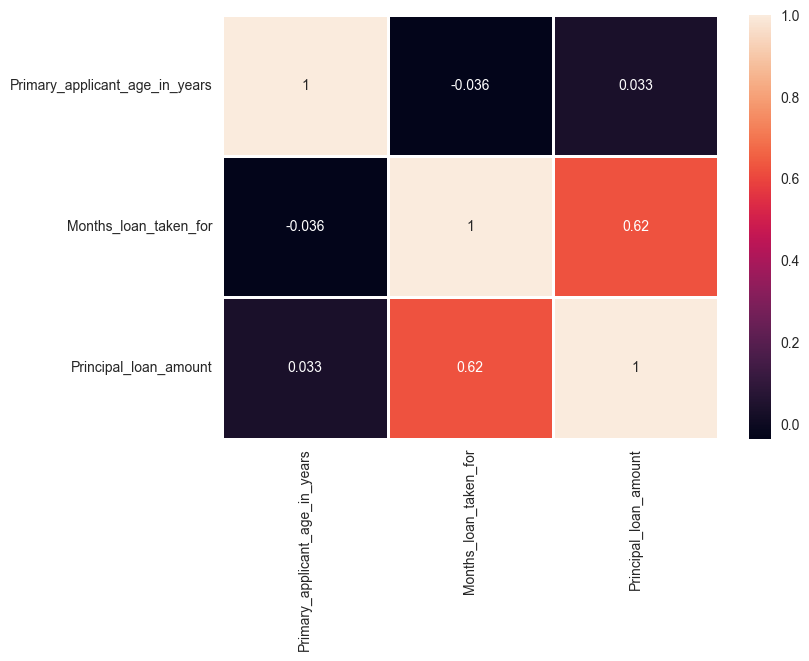

In [15]:
sns.heatmap(data.select_dtypes(include = "number", exclude = "object").corr(), annot = True, linewidths = 1)
#plt.tight_layout()
plt.show()

If :-
- value > 0.85 it is highly correlated.
- value is Between 0.40 and 0.85, it is moderately correlated.
- value < 0.40, it is weakly correlated.


From above heatmap we can conclude that :-
- positive and moderate Correlation between Principal loan amount and Months loan taken for.
- Negative & Weak correlation between Months loan taken for and Primary applicants age.
- Weak correlation between Principal loan amount and Primary applicant age.

Pie-Chart of Object datatypes: -

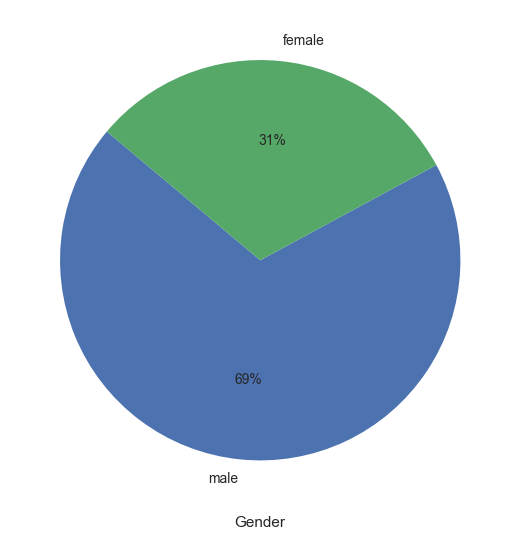

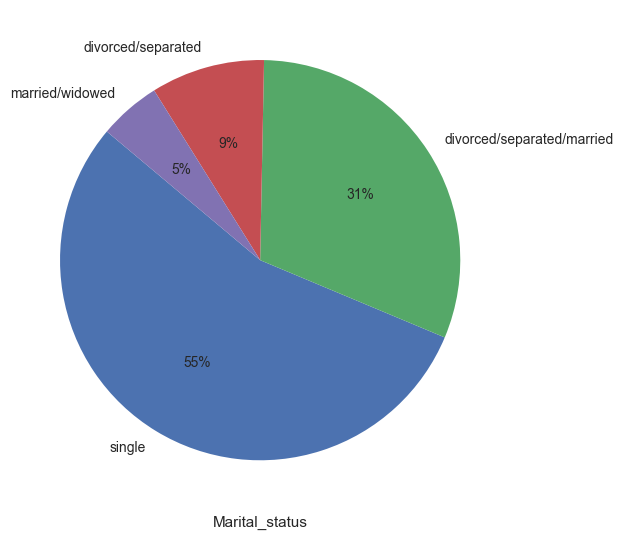

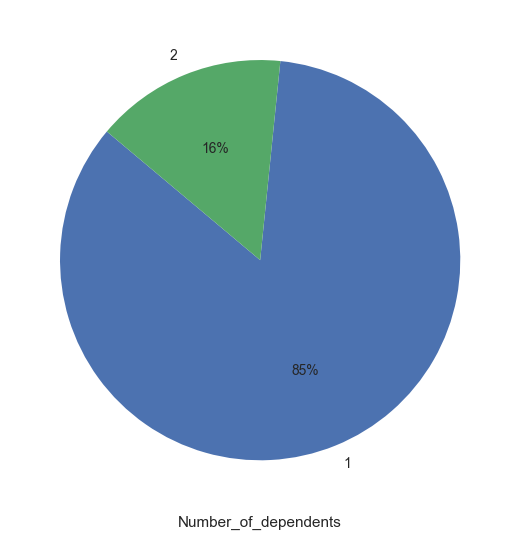

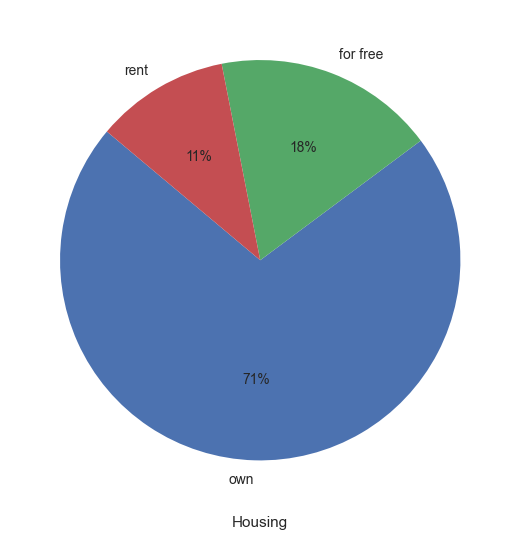

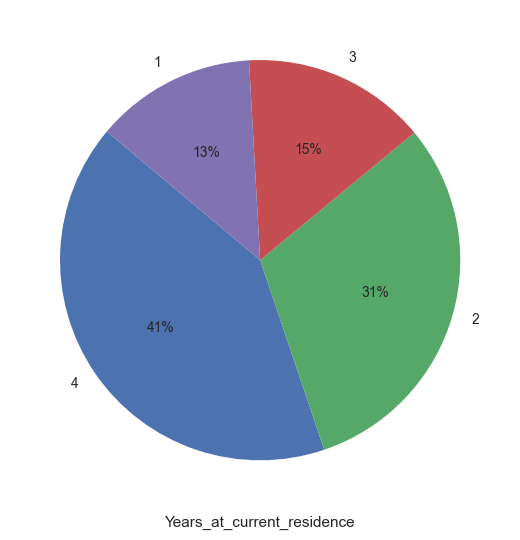

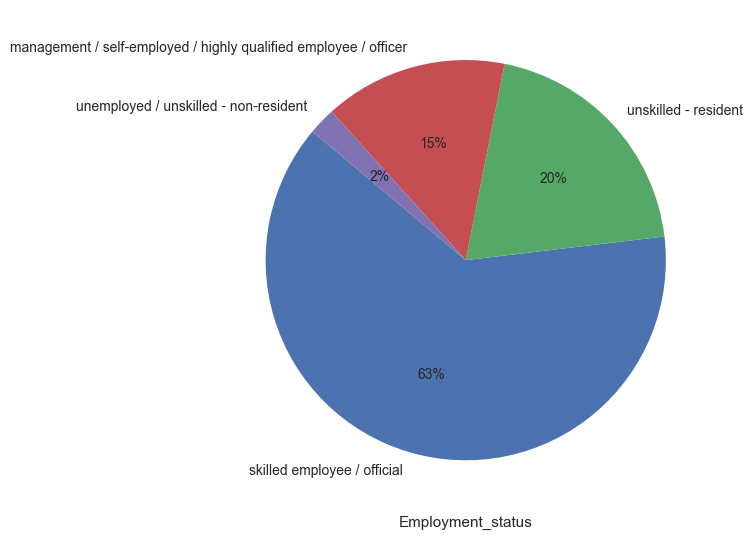

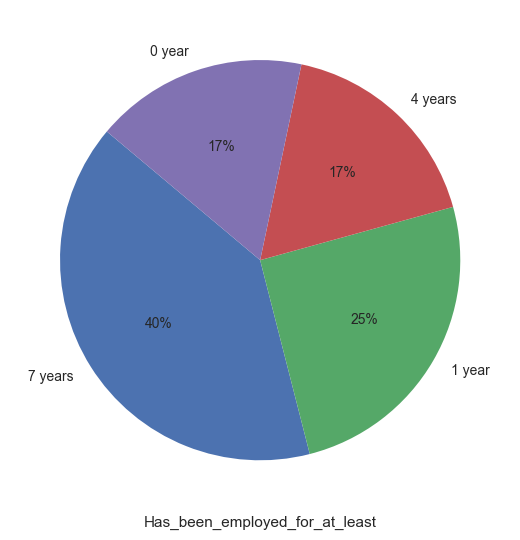

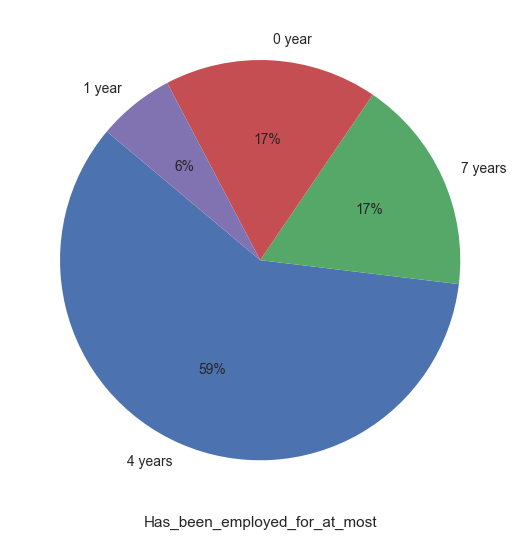

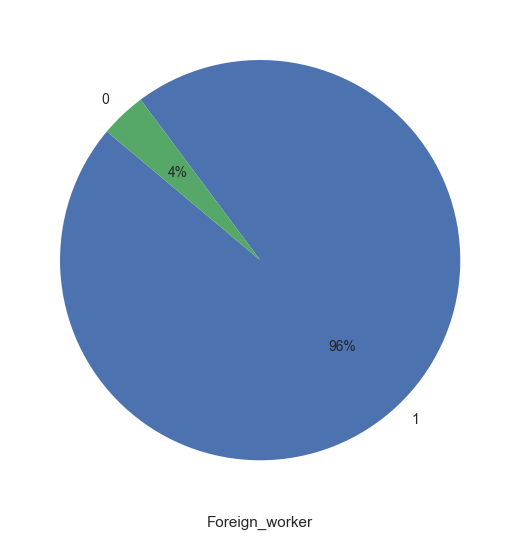

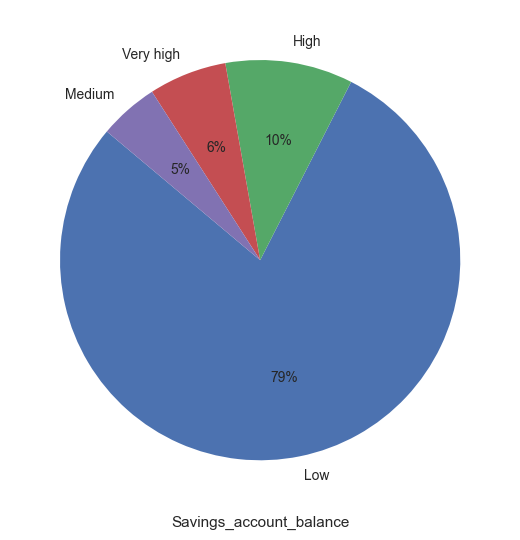

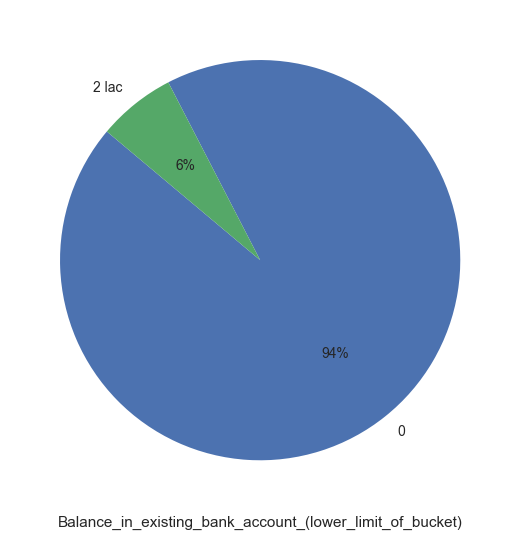

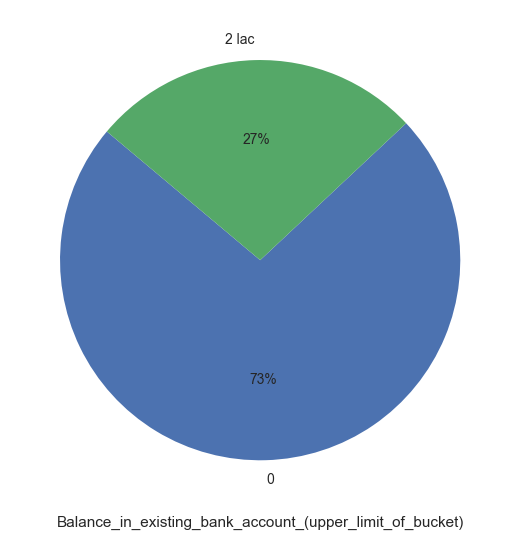

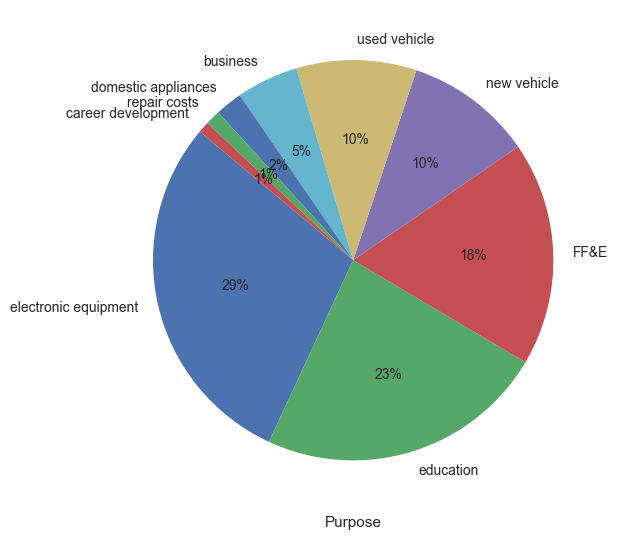

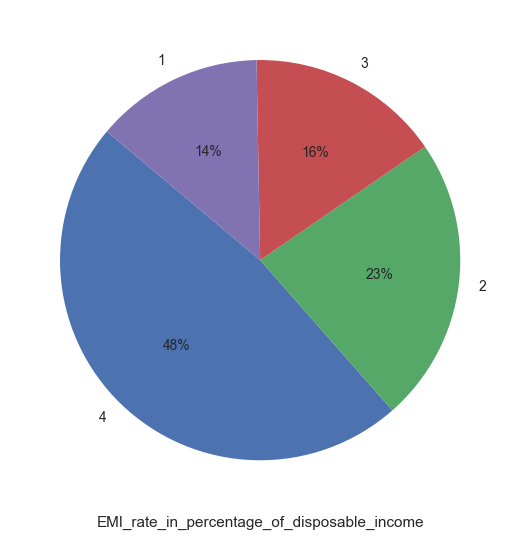

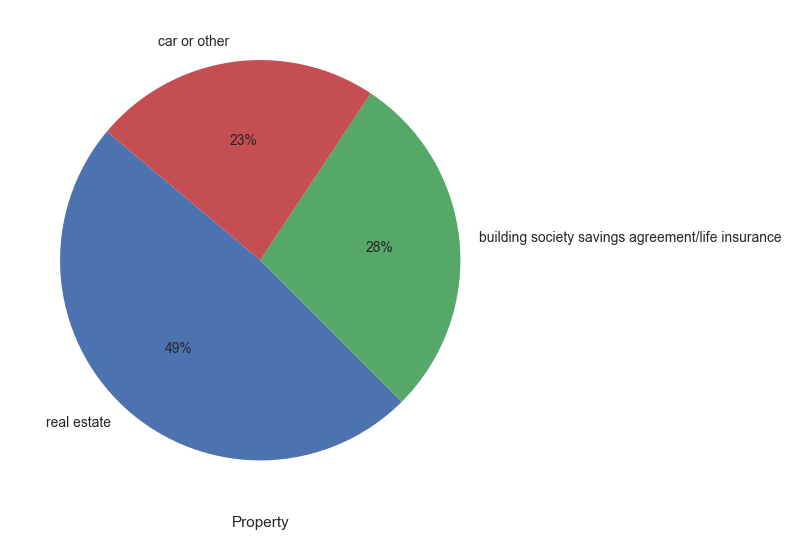

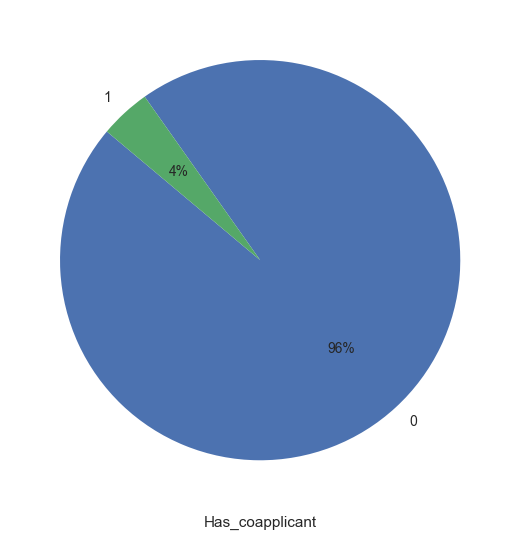

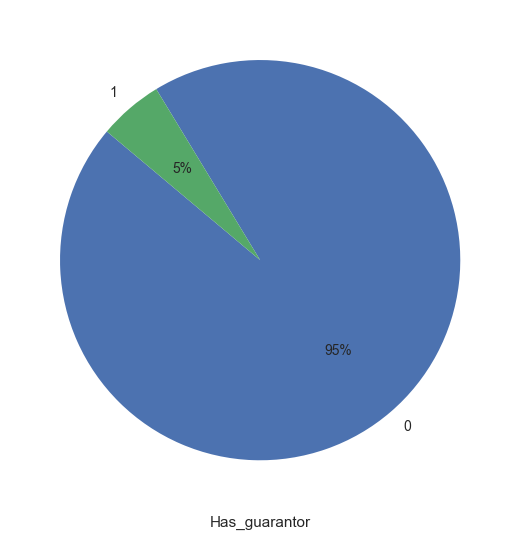

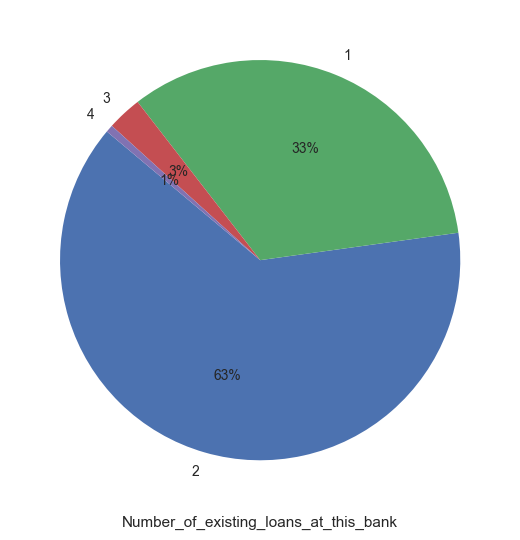

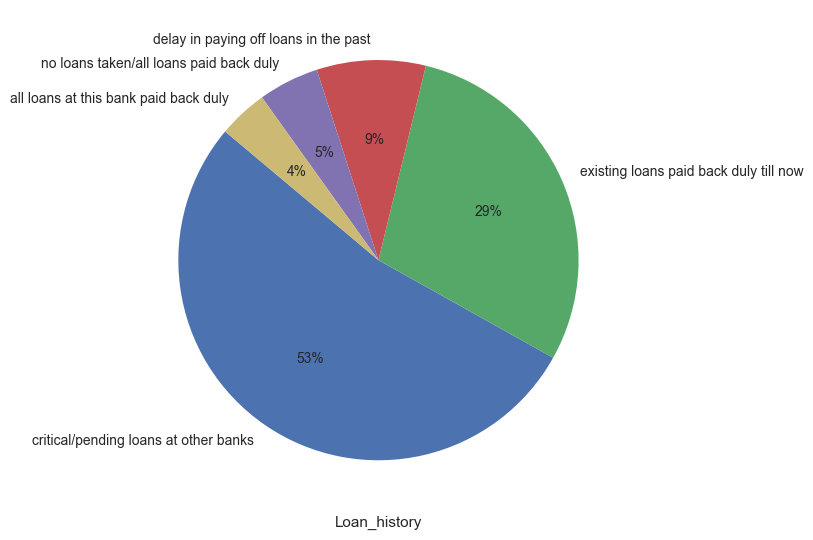

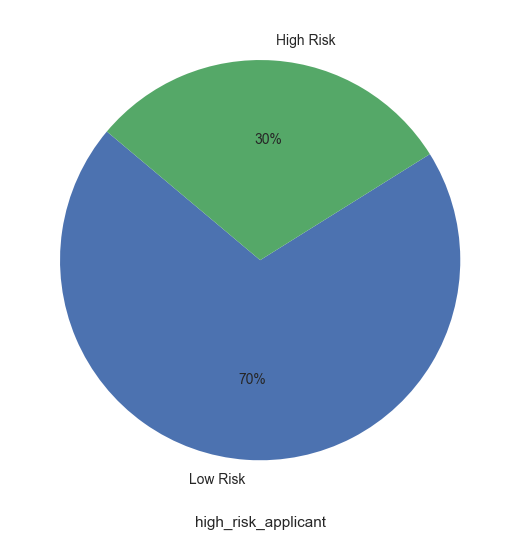

In [16]:
def pie(j):

    labels = list(data[j].unique())
    sizes = list(data[j].value_counts())

    plt.pie(sizes,
            labels = labels,
            textprops = {"fontsize":10},
            startangle = 140,
            autopct = "%1.0f%%")
    plt.xlabel("{}".format(j))

    plt.tight_layout()
    plt.show()

for j in data.select_dtypes(include = "object", exclude = "number").columns:
    pie(j)

From above chart we can drew some inferences about the applicants:-

- 69% of applicants are male and 31% are female.
- 55% of applicants are single, 31% are divorced/separated/married, 9% are divorced/separated and 5% are married/widowed.
- 85% of applicants have 1 dependent and 15% have 2 dependent.
- 71% of applicants are living in their own house, 18% are living for free and 11% are living on rent.
- 41% of applicants are living at current residence for last 4 years, 31% are living for 2years, 15% are living for 3 years and 13% are living for 1 year.
- 63% of applicants are skilled employee/ official, 20% are unskilled - resident, 15% are management/self-employed/highly qualified employee/officer and 2% are unemployed/ unskilled- non-resident.
- 40% of applicants are employed for at least 7 years, 25% are employed for 1 year, 17% are employed fro 4 years and 17% are employed for 0 year.
- 59% of applicants are employed for at most 4 years, 17% for 7 years, 17% for 0 year and 6% for 1 year.
- 96%of the applicants are foreign worker
- 79% of applcants have low acount balance, 5% have medium, 10% have high and 6% have very high savings account balance.
- 94% of applicants have balance in lower limit 
- 73% have balance in upper limit
- 29% of applicants are taking loan for the purpose of electronic equipment, 23% for education, 18% for FF&E, 10% for new vehicle,10% for used vehicle, 5% for business, 2% for domestic appliances, 1% fro repair cost and 1% for career development.
- 48% of applicnts have emi rate 4%, 23% have emi rate 2%, 16% have emi rate 3% and 14% have emi rate 1%.
- 49% of applicants have property in real estate, 28% in building society / life  insurance and 23% have car or other.
- 96% of applicants have no coapplicant.
- 95% of applicants have no guarantor.
- 63% of applicants have 2loans at this bank, 33% have 1 loan, 3% have 3 loan and 1% have 4 loan.
- 53% of applicants have pending loans at other banks, 29% paid back duly till now, 9% delay in paying, 5% never took a loan and 4% paid all loans at this bank.
- 70% of applicants will pay the loan and 30% of applicants may go default.

Histogram :- 

A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins

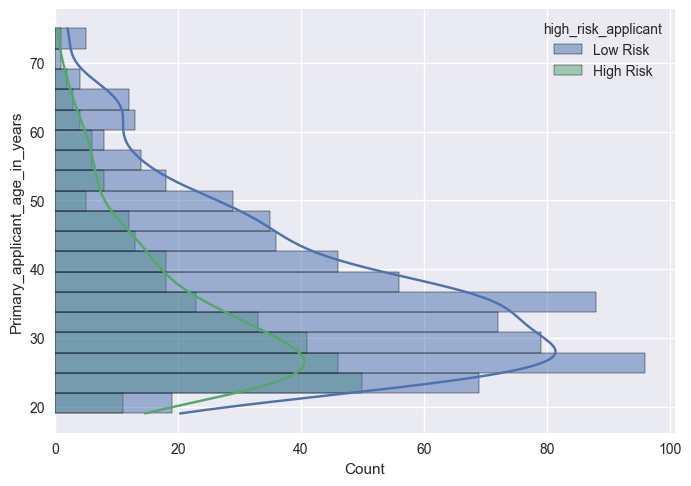

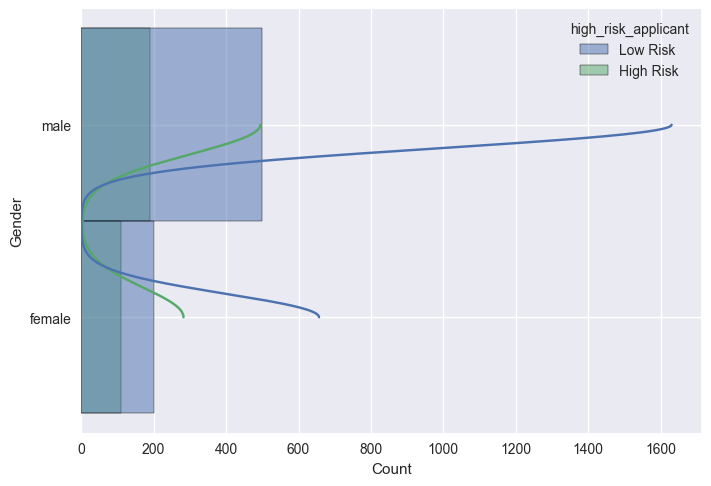

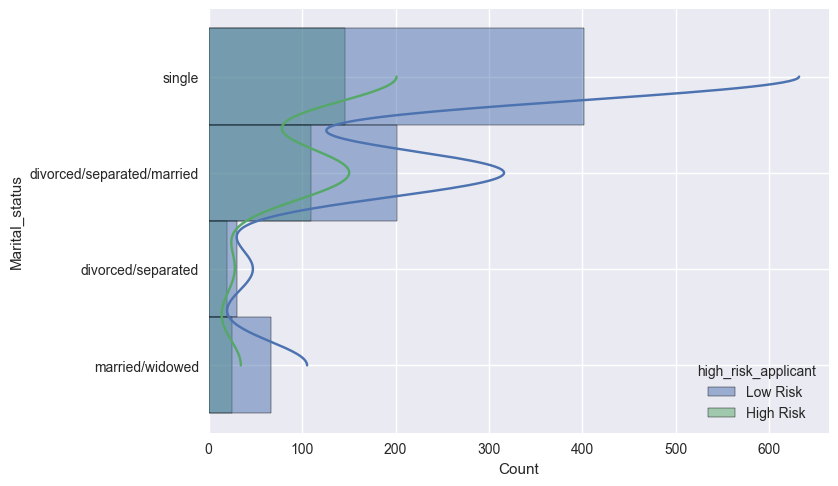

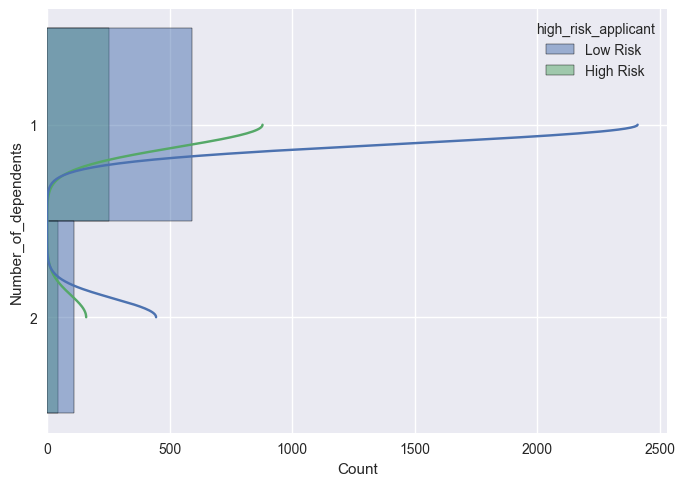

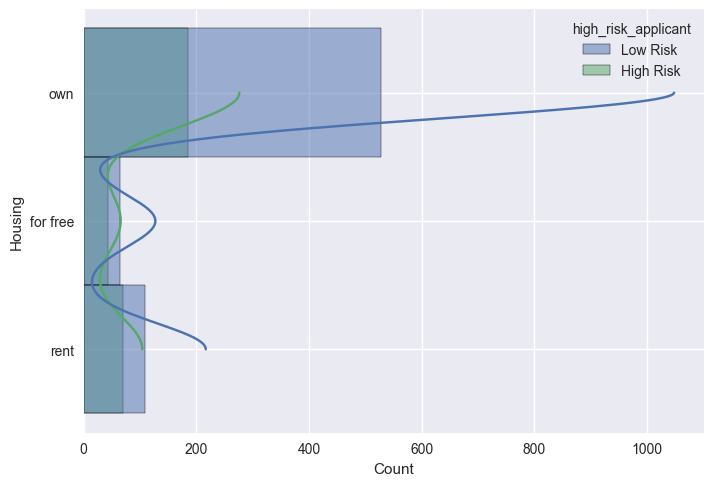

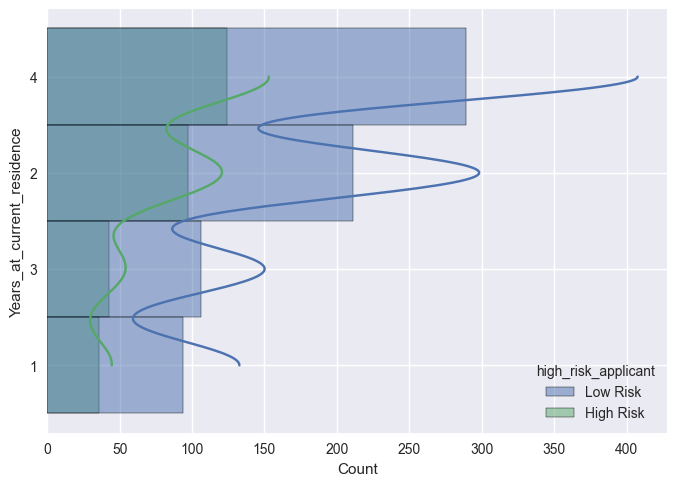

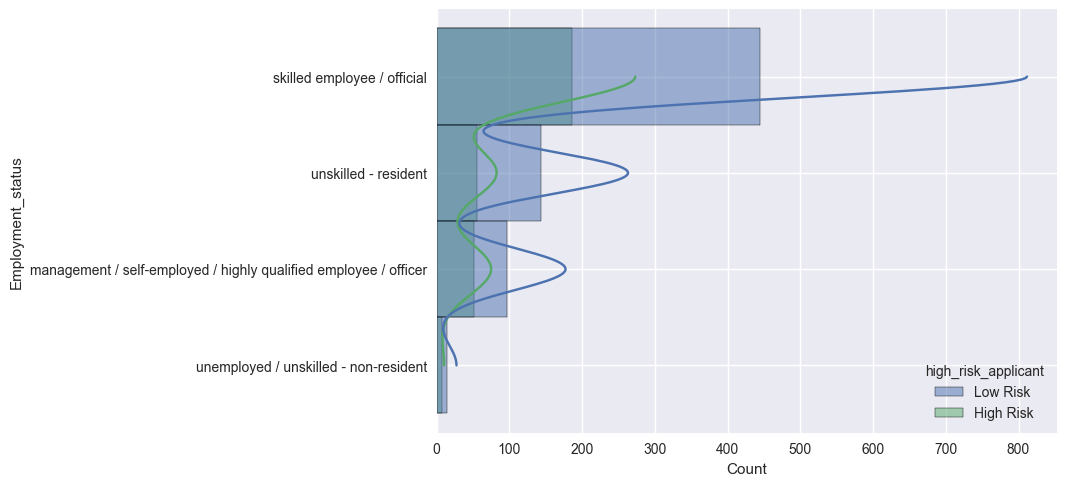

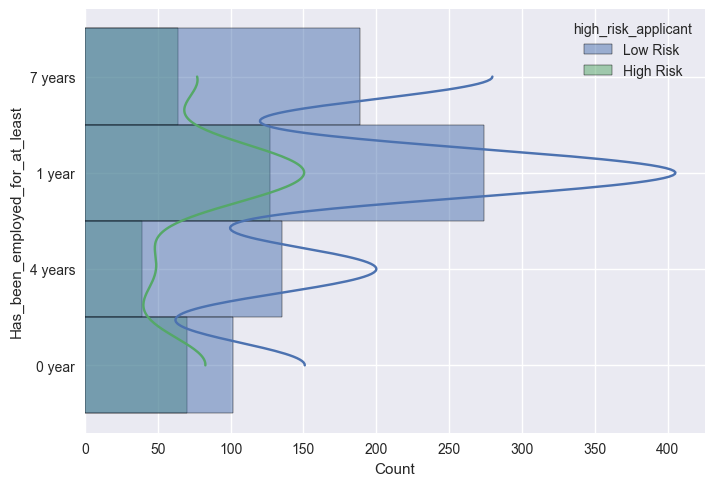

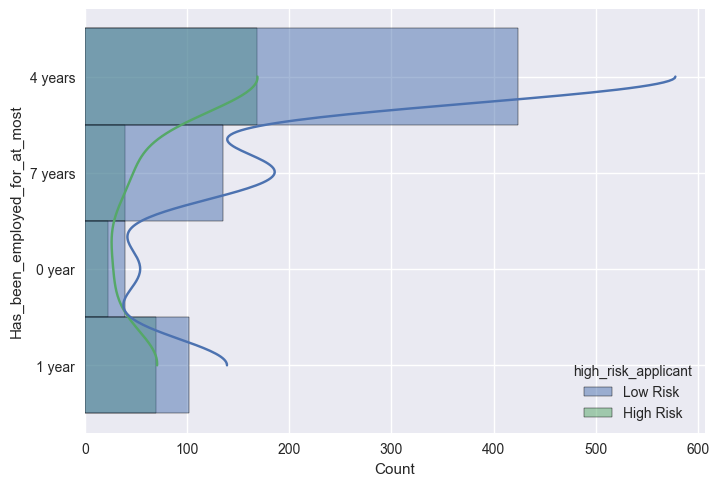

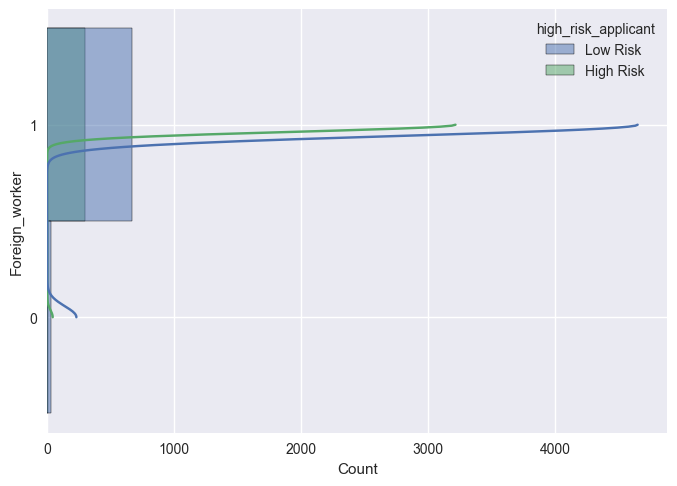

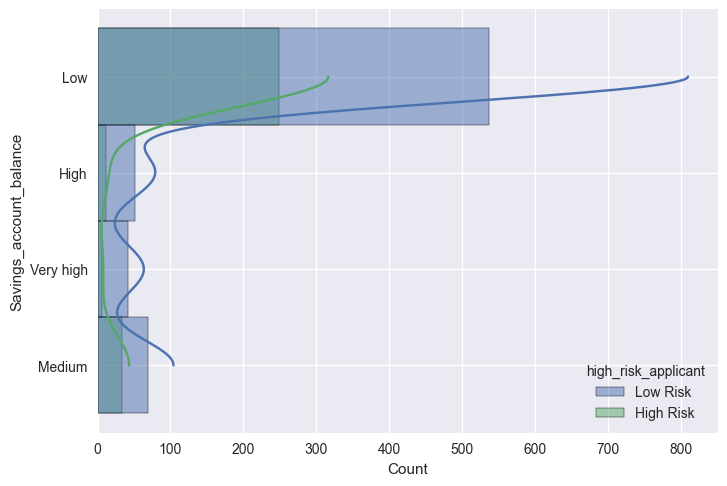

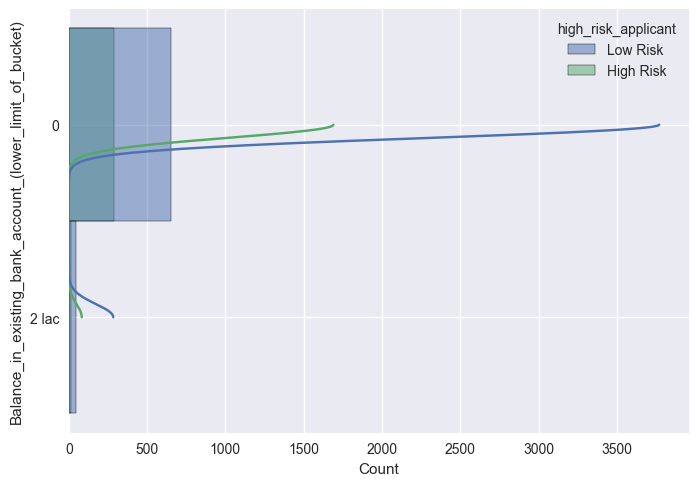

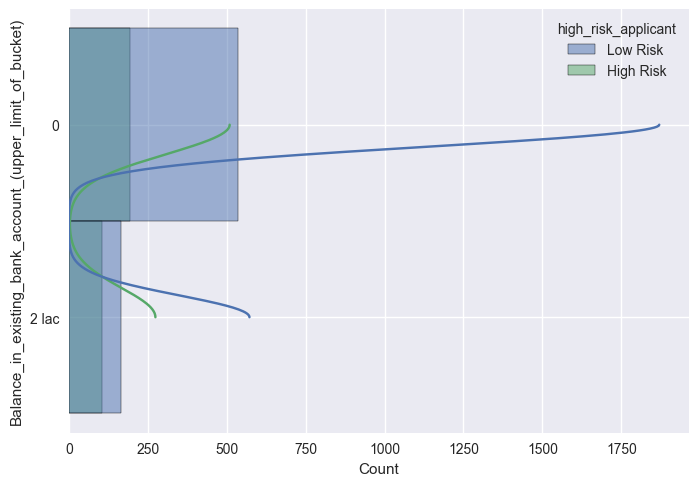

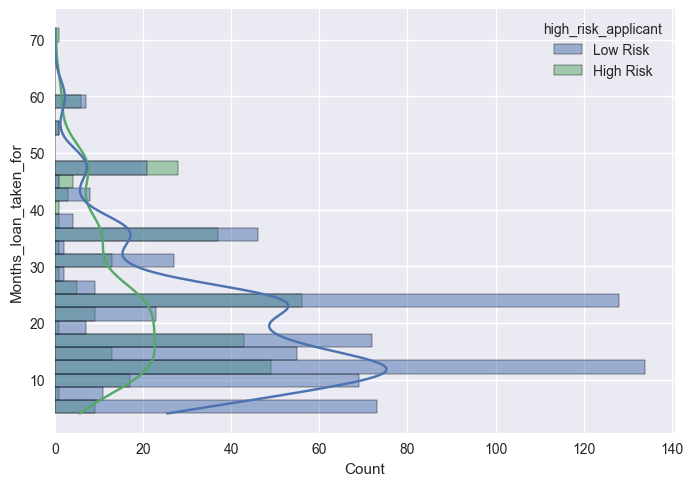

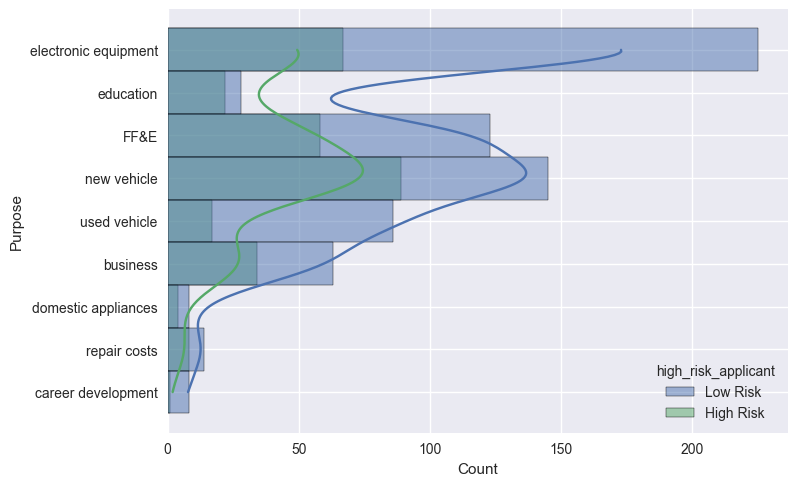

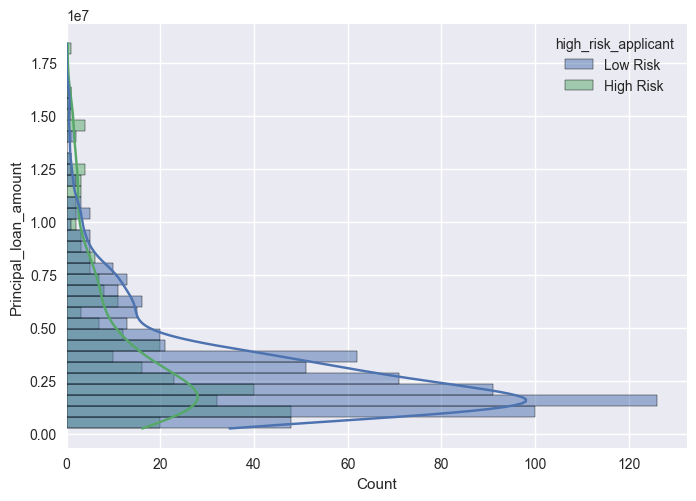

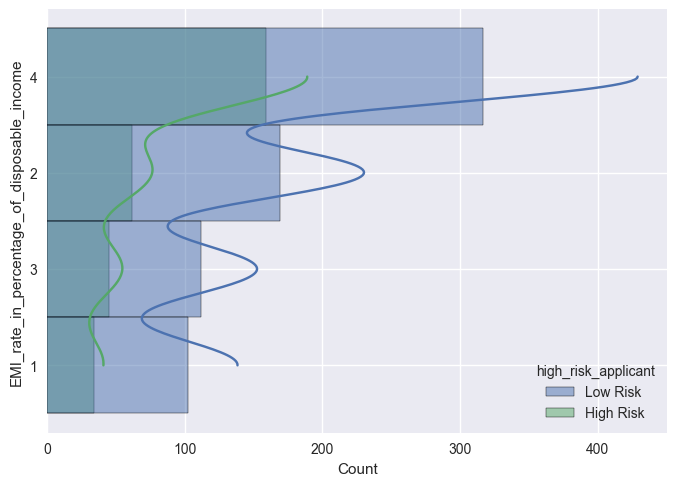

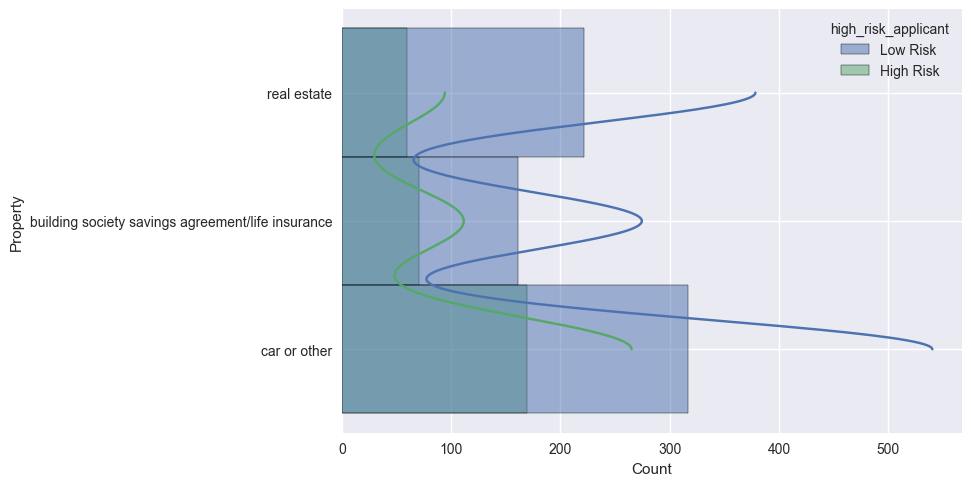

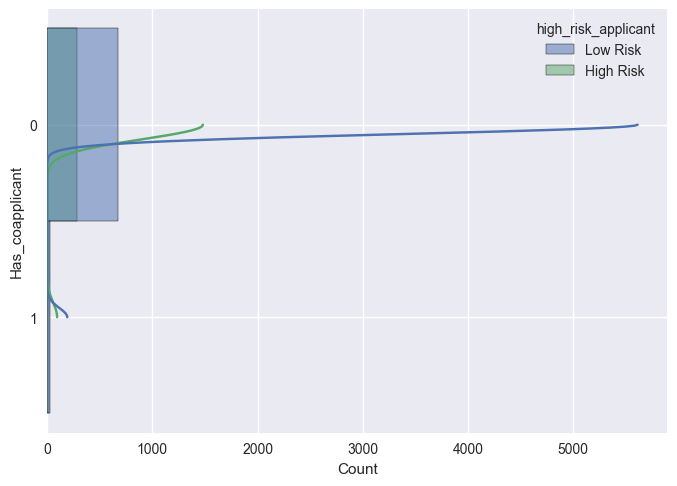

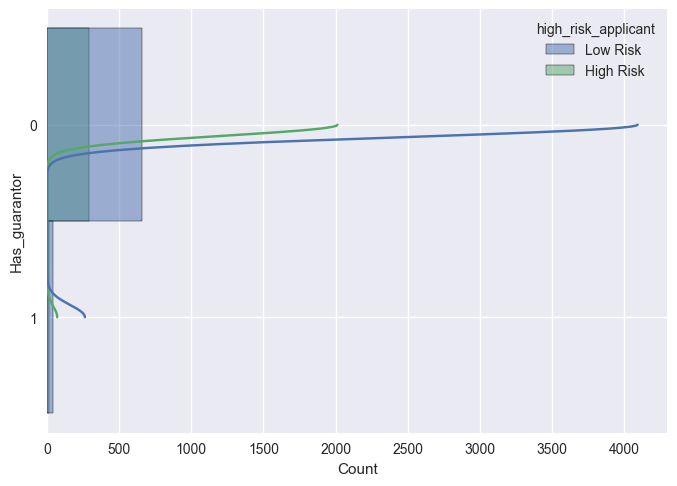

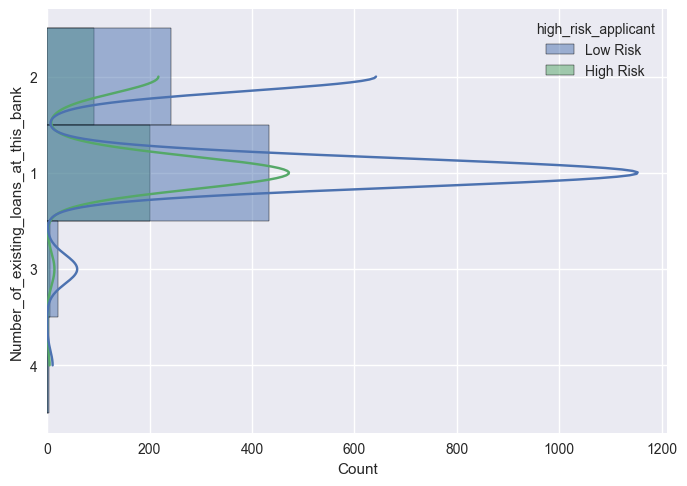

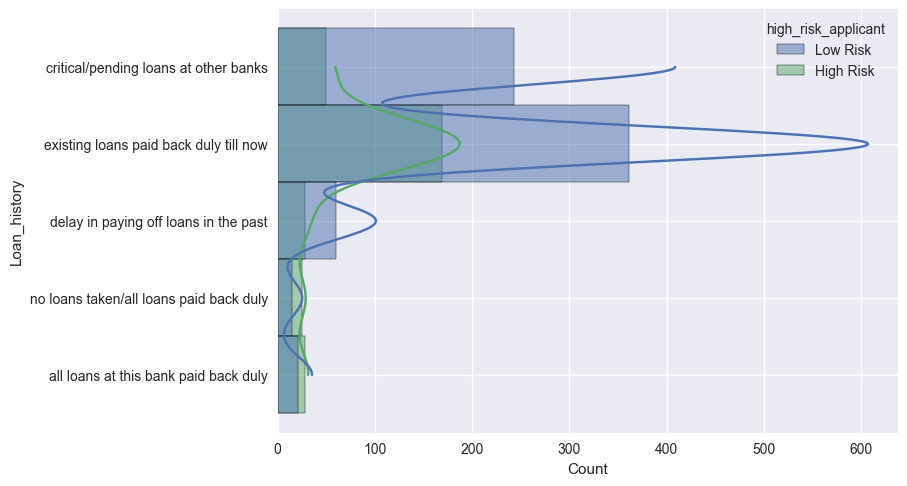

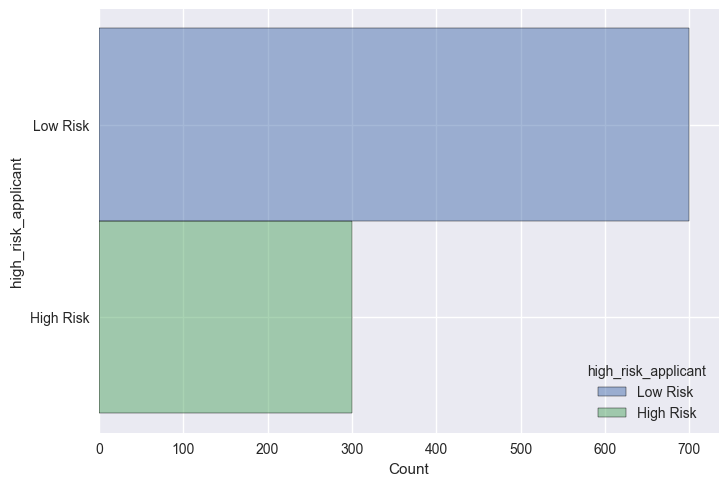

In [17]:
def col(j):
    
    sns.histplot(y = data[j], hue = data["high_risk_applicant"], kde = True)
    #plt.xlabel("{}".format(j))
    plt.show()

for j in data.columns:
    col(j)

From above histogram plot we can drew inference in respect to target variable|:-

- Most of the people applying for loan are between the age 20-40. 
- Chances of male for being default is less in comparison to women.As in female there is 50-50% chance that the women will go default while in men there is 60-40% chance.
- Singles have a good chance of repaying their loan, divorceed/separated/married have 50-50% chance of paying the loan back, divorced/separated are very risky, married/widowed also have a 60% chance of paying back the loan.
- No. of dependents doesn't giving much inference whether they will be default or not.
- Applicants who own their own house have a very chance of repaying the loan, while applicants who are living for free or on rent have a very chance of going default.
- Skilledemployee/official have 60% chance of repaying the loan and unemployed/ unskilled - non-resident have very less chance of repaying the loan.
- Applicants who has been employed for at least 7 years or 4 years have very less of going default, whereas applicants who are employed for at least 0 year have very high chance of going default.
- Applicants who has been employed for at most 4years and 7 years have very good chance of repaying the loan whereas applicants who has been employed for at most 1year have a good chance of going default.
- Applicants who have high and very high account balance have a very good chance of repaying the loan whereas applicants who have low and medium account balance have a 50-50% chance of getting default.
-  Appliacants who are taking loan for less than 24months have a very high chance of repaying the loan.
- Applicants who are taking loan for the purpose of electronic equipment, used vehicle and career development are repaying the loans, whereas applicants who are taking loan for the purpose of eduaction are not repaying, and the rest have a 50-50% chance of repaying.
- Applicants who are taking less amount have a high chance of repayment.
- Lower the emi rate, more chances of repayment.
- Applicants who have property as a real estate are at low risk.


Countplot for Primary applicant age :-

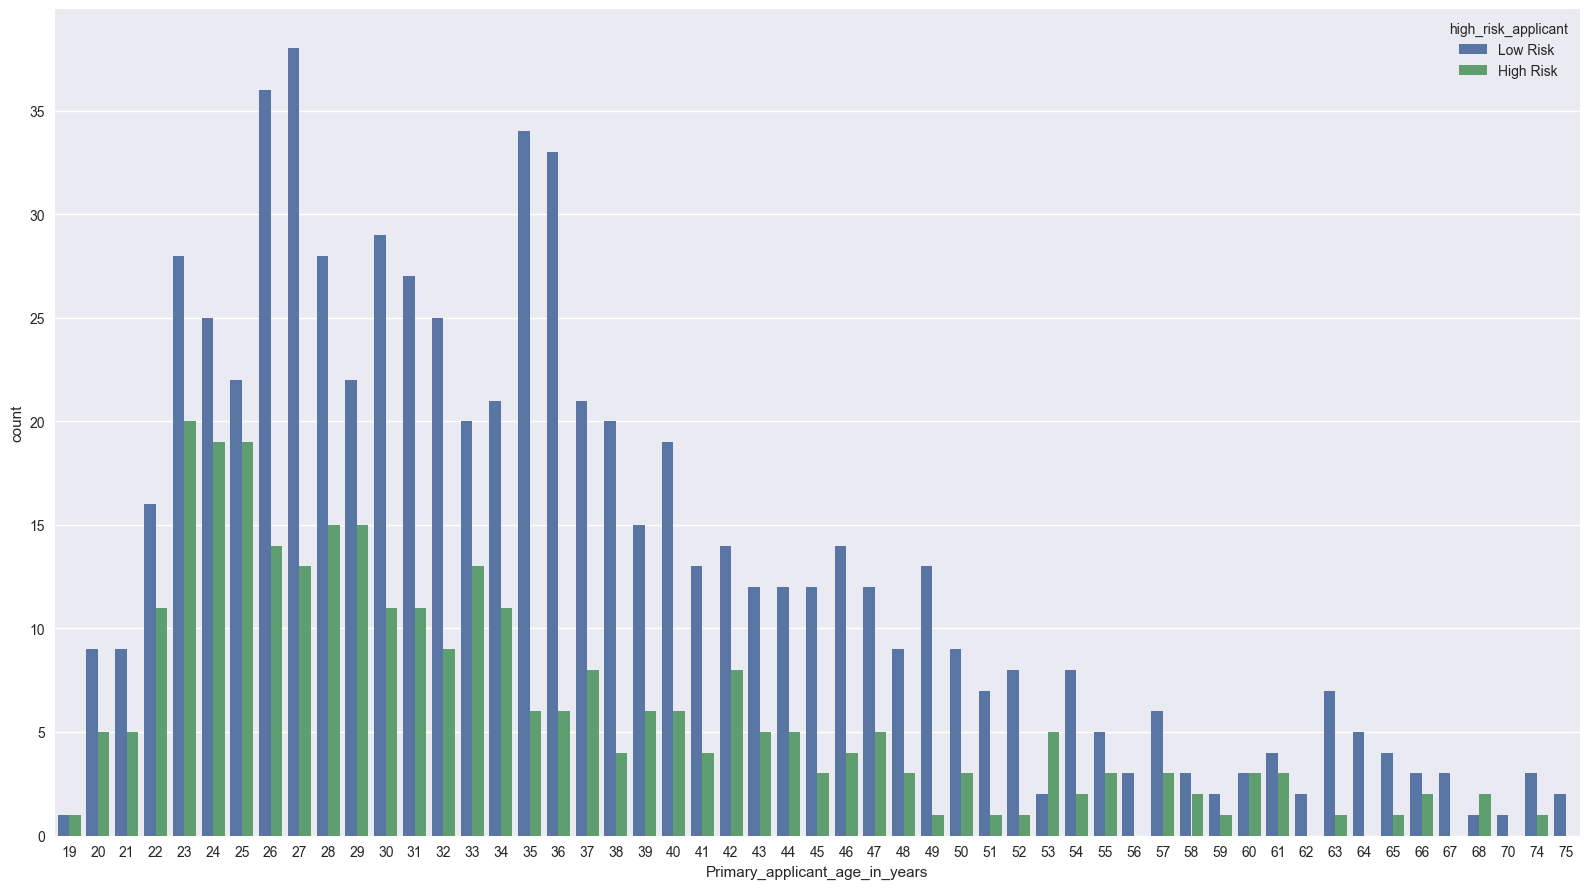

In [18]:

plt.figure(figsize = (16,9))
sns.countplot(x = data["Primary_applicant_age_in_years"], hue = data["high_risk_applicant"])
plt.tight_layout()
plt.show()

From above countplot, we can derive insights like :-
- Most of the applicants are between the age 23 to 40.

Creating dist plot for checking the distribution of numerice datatype:-

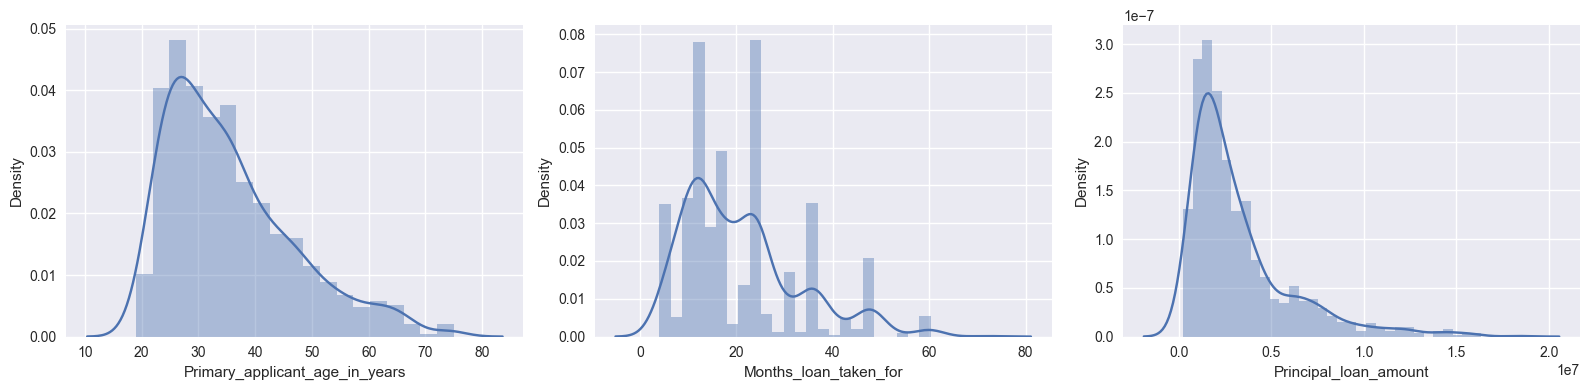

In [19]:
plt.figure(figsize = (16,4))

for i,j in enumerate(data.select_dtypes(include = "number", exclude = "object").columns):

    plt.subplot(1,3,i+1)

    sns.distplot(data[j])
    plt.xlabel("{}".format(j))

    plt.tight_layout()

plt.subplots_adjust()
plt.show()


From the above distplot, we can say that :-
- All the columns are not normal and are left-skewed
- There is multiple cluster in Months_loan_taken_for

Boxplot :- It is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles.

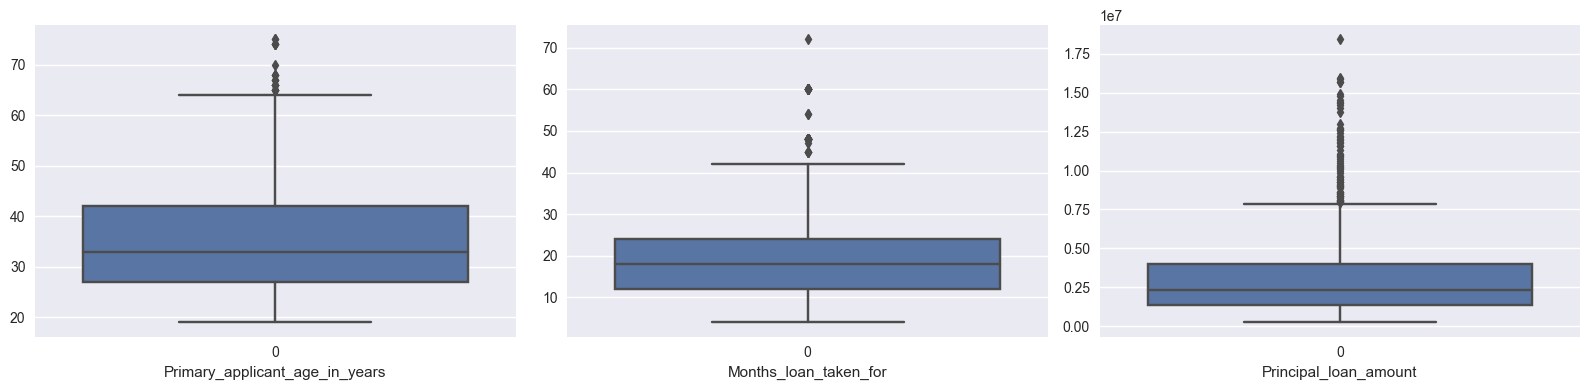

In [20]:
plt.figure(figsize = (16,4))

for i,j in enumerate(data.select_dtypes(include = "number", exclude = "object").columns):

    plt.subplot(1,3,i+1)

    sns.boxplot(data[j])
    plt.xlabel("{}".format(j))

    plt.tight_layout()

plt.subplots_adjust()
plt.show()

There are outliers present in upper whisker.

Probplot : For checking the normality of the data. It creates a normal probability plot comparing the distribution of the data in y to the normal distribution.

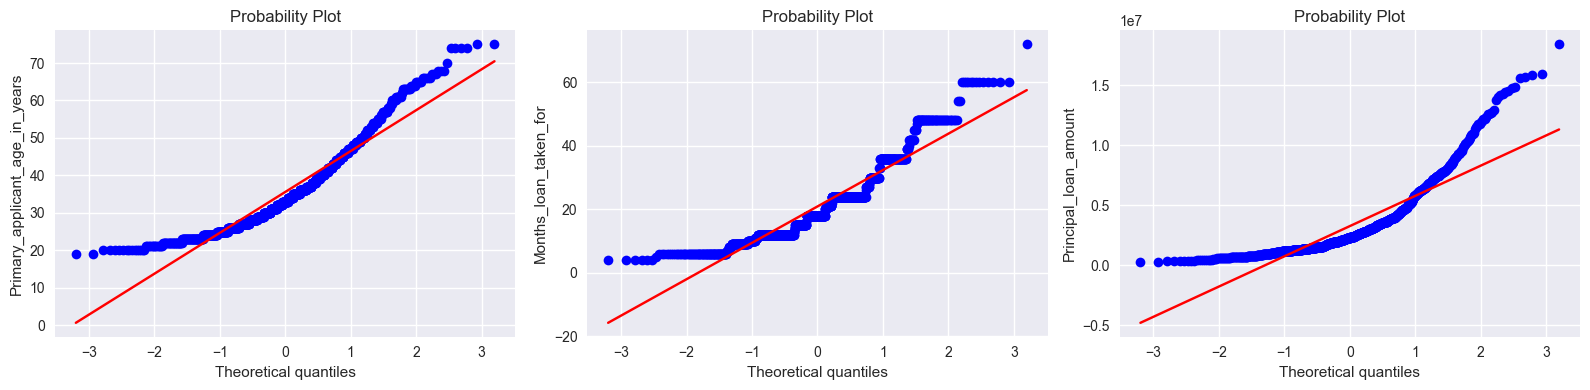

In [21]:
from scipy import stats
plt.figure(figsize = (16,4))

for i,j in enumerate(data.select_dtypes(include = "number", exclude = "object").columns):

    plt.subplot(1,3,i+1)

    stats.probplot(data[j], dist = "norm", plot = plt)
    plt.ylabel("{}".format(j))

    plt.tight_layout()

plt.subplots_adjust()
plt.show()

We can see that data are not normally distributed. It is following exponential trend

Standard Deviation :- 

The standard deviation is the average amount of variability in your dataset. It tells you, on average, how far each value lies from the mean. A high standard deviation means that values are generally far from the mean, while a low standard deviation indicates that values are clustered close to the mean.

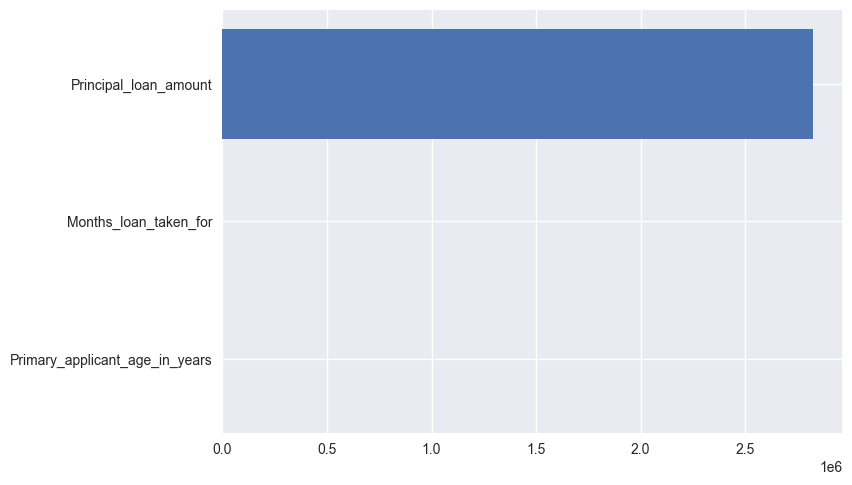

In [22]:
plt.barh(width = data.select_dtypes(include = "number").std(), y = data.select_dtypes(include = "number").columns)
plt.show()

From the above graph, it is clear that principal_loan_amount have very high standard deviation in comparison to other columns.

Skewness - 

Skewness is a measure of asymmetry or distortion of symmetric distribution. It measures the deviation of the given distribution of a random variable from a symmetric distribution, such as normal distribution. A normal distribution is without any skewness, as it is symmetrical on both sides

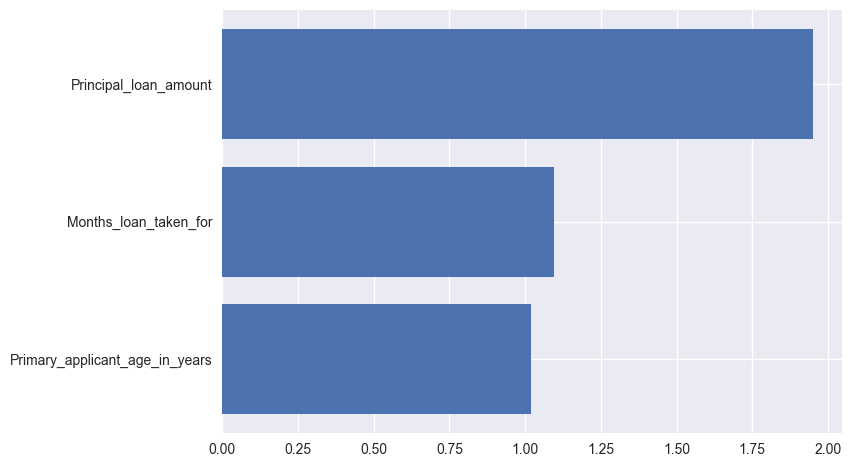

In [23]:
plt.barh(width = data.select_dtypes(include = "number").skew(), y = data.select_dtypes(include = "number").columns)
plt.show()

From above grapgh it is clear that data are right-skewed

Kurtosis :-

Kurtosis is a measure of the tailedness of a distribution. Tailedness is how often outliers occur. Excess kurtosis is the tailedness of a distribution relative to a normal distribution. Distributions with medium kurtosis (medium tails) are mesokurtic. Distributions with low kurtosis (thin tails) are platykurtic.

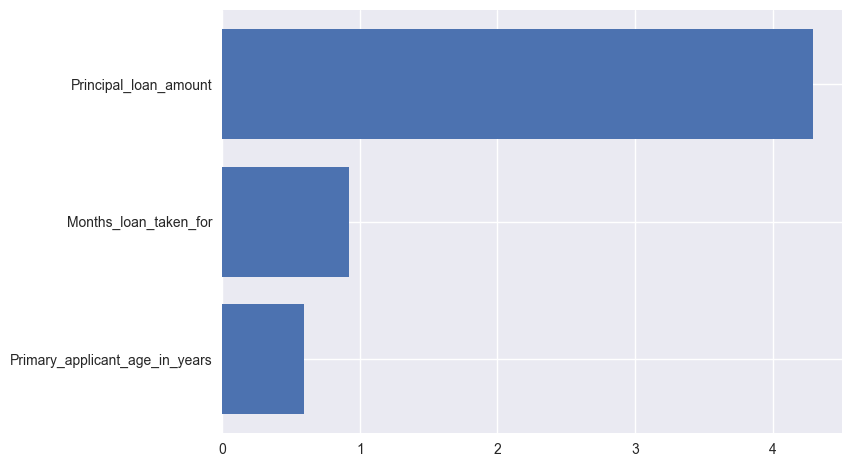

In [24]:
plt.barh(width = data.select_dtypes(include = "number").kurt(), y = data.select_dtypes(include = "number").columns)
plt.show()

Checking the description of the numeric columns left after performing typecasting

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Primary_applicant_age_in_years,1000.0,35.546,1.137547e+01,19.0,27.0,33.0,42.0,75.0
Months_loan_taken_for,1000.0,20.903,1.205881e+01,4.0,12.0,18.0,24.0,72.0
Principal_loan_amount,1000.0,3271258.000,2.822737e+06,250000.0,1365500.0,2319500.0,3972250.0,18424000.0


### Feature Scaling

Feature scaling transforms the features in dataset so they have a mean of zero and a variance of one. This will make it easier to linearly compare features. Also, this is a requirement for many models.

In [26]:
from sklearn.preprocessing import StandardScaler  #For performing standardisation on numerical data
data["Primary_applicant_age_in_years"] = StandardScaler().fit_transform(data[["Primary_applicant_age_in_years"]])
data["Months_loan_taken_for"] = StandardScaler().fit_transform(data[["Months_loan_taken_for"]])
data["Principal_loan_amount"] = StandardScaler().fit_transform(data[["Principal_loan_amount"]])

In [27]:
# Importing labelencoder for converting datatypes from object to integer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

In [28]:
def label_encoding(i):
    data[i] = LabelEncoder().fit_transform(data[i])
    return data[i]

for i in data.select_dtypes(include = "object").columns:
    label_encoding(i)

data

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,2.766456,1,3,0,1,3,1,3,2,1,...,-1.236478,5,-0.745131,3,2,0,0,1,1,1
1,-1.191404,0,1,0,1,1,1,1,2,1,...,2.248194,5,0.949817,1,2,0,0,0,3,0
2,1.183312,1,3,1,1,2,3,2,3,1,...,-0.738668,4,-0.416562,1,2,0,0,0,1,1
3,0.831502,1,3,1,0,3,1,2,3,1,...,1.750384,0,1.634247,1,0,0,1,0,3,1
4,1.535122,1,3,1,0,3,1,1,2,1,...,0.256953,6,0.566664,2,1,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.399832,0,1,0,1,3,3,2,3,1,...,-0.738668,0,-0.544162,2,2,0,0,0,3,1
996,0.391740,1,0,0,1,3,0,1,2,1,...,0.754763,8,0.207612,3,0,0,0,0,3,1
997,0.215835,1,3,0,1,3,1,3,2,1,...,-0.738668,5,-0.874503,3,1,0,0,0,3,1
998,-1.103451,1,3,0,0,3,1,1,2,1,...,1.999289,5,-0.505528,3,1,0,0,0,3,0


### Clustering

clustering is an unsupervised machine learning algorithm that groups unlabeled datasets. It aims to form clusters or groups using the data points in a dataset in such a way that there is high intra-cluster similarity and low inter-cluster similarity.

- Clustering is an unsupervised problem of finding natural groups in the feature space of input data.
- There are many different clustering algorithms and no single best method for all datasets.

Here, I am going to use KMeans cluster.

It is implemented via the KMeans class and the main configuration to tune is the “n_clusters” hyperparameter set to the estimated number of clusters in the data.

The way kmeans algorithm works is as follows:

- Specify number of clusters K.
- Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
- Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
- Compute the sum of the squared distance between data points and all centroids.
- Assign each data point to the closest cluster (centroid).
- Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

In [29]:
# Importing KMeans for cluster
from sklearn.cluster import KMeans

In [30]:
# Calculating Sum of Squared Error
SSE = []

k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters = k).fit(data.iloc[:,:])
    SSE.append(km.inertia_)

SSE

[19466.073,
 13612.303047078673,
 12524.474479637975,
 11664.649498880797,
 11218.206980606989,
 10777.927506901233,
 10397.481185490346,
 10118.952085091478,
 9909.27812826424]

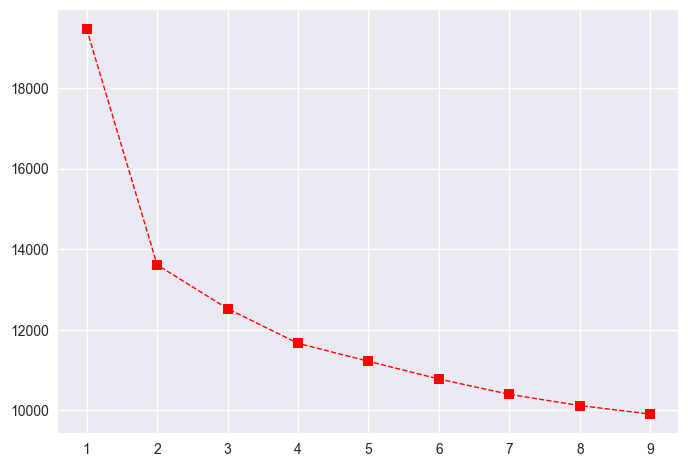

In [31]:
# Plotting elbow-curve for finding out the most accurate K-value
plt.plot(k_range, SSE, ls = "--", lw = 1, marker = "s", color = "r")
plt.show()

For selecting k-value, we look at the bend of the line. Here, it is showing 2 as the best k-value.
so, now we select n_clusters =2 for clustering

In [32]:
model_km = KMeans(n_clusters = 2).fit(data.iloc[:,:])
model_km

KMeans(n_clusters=2)

In [33]:
model_km.labels_

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,

In [34]:
# Importing the original dataset
df_data = pd.read_csv("D:\DATA\data_.csv")
df_data

,Unnamed: 0,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,0,67,male,single,1,own,4,skilled employee / official,7 years,4 years,...,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,Low Risk
1,1,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,...,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,High Risk
2,2,49,male,single,2,own,3,unskilled - resident,4 years,7 years,...,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,Low Risk
3,3,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,...,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,Low Risk
4,4,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,...,24,new vehicle,4870000,3,car or other,0,0,2,delay in paying off loans in the past,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,divorced/separated/married,1,own,4,unskilled - resident,4 years,7 years,...,12,FF&E,1736000,3,real estate,0,0,1,existing loans paid back duly till now,Low Risk
996,996,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1 year,4 years,...,30,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,1,existing loans paid back duly till now,Low Risk
997,997,38,male,single,1,own,4,skilled employee / official,7 years,4 years,...,12,electronic equipment,804000,4,car or other,0,0,1,existing loans paid back duly till now,Low Risk
998,998,23,male,single,1,for free,4,skilled employee / official,1 year,4 years,...,45,electronic equipment,1845000,4,car or other,0,0,1,existing loans paid back duly till now,High Risk


In [35]:
# Creating and adding the column name "cluster" and filling with "model_km.labels" values
df_data["Cluster"] = model_km.labels_
df_data = df_data.iloc[:,1:]
df_data

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,Cluster
0,67,male,single,1,own,4,skilled employee / official,7 years,4 years,1,...,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,Low Risk,0
1,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,1,...,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,High Risk,0
2,49,male,single,2,own,3,unskilled - resident,4 years,7 years,1,...,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,Low Risk,0
3,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,1,...,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,Low Risk,1
4,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,1,...,new vehicle,4870000,3,car or other,0,0,2,delay in paying off loans in the past,High Risk,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,divorced/separated/married,1,own,4,unskilled - resident,4 years,7 years,1,...,FF&E,1736000,3,real estate,0,0,1,existing loans paid back duly till now,Low Risk,1
996,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1 year,4 years,1,...,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,1,existing loans paid back duly till now,Low Risk,0
997,38,male,single,1,own,4,skilled employee / official,7 years,4 years,1,...,electronic equipment,804000,4,car or other,0,0,1,existing loans paid back duly till now,Low Risk,0
998,23,male,single,1,for free,4,skilled employee / official,1 year,4 years,1,...,electronic equipment,1845000,4,car or other,0,0,1,existing loans paid back duly till now,High Risk,0


In [36]:
df_data["Cluster"] = model_km.labels_
df_data

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,Cluster
0,67,male,single,1,own,4,skilled employee / official,7 years,4 years,1,...,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,Low Risk,0
1,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,1,...,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,High Risk,0
2,49,male,single,2,own,3,unskilled - resident,4 years,7 years,1,...,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,Low Risk,0
3,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,1,...,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,Low Risk,1
4,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,1,...,new vehicle,4870000,3,car or other,0,0,2,delay in paying off loans in the past,High Risk,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,divorced/separated/married,1,own,4,unskilled - resident,4 years,7 years,1,...,FF&E,1736000,3,real estate,0,0,1,existing loans paid back duly till now,Low Risk,1
996,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1 year,4 years,1,...,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,1,existing loans paid back duly till now,Low Risk,0
997,38,male,single,1,own,4,skilled employee / official,7 years,4 years,1,...,electronic equipment,804000,4,car or other,0,0,1,existing loans paid back duly till now,Low Risk,0
998,23,male,single,1,for free,4,skilled employee / official,1 year,4 years,1,...,electronic equipment,1845000,4,car or other,0,0,1,existing loans paid back duly till now,High Risk,0


In [37]:
# Separating both the clusters

df_a = df_data[df_data["Cluster"] == 0]
df_b = df_data[df_data["Cluster"] == 1]
#df_c = data[data["Cluster"] == 2]

display(df_a, df_b)

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,Cluster
0,67,male,single,1,own,4,skilled employee / official,7 years,4 years,1,...,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,Low Risk,0
1,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,1,...,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,High Risk,0
2,49,male,single,2,own,3,unskilled - resident,4 years,7 years,1,...,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,Low Risk,0
4,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,1,...,new vehicle,4870000,3,car or other,0,0,2,delay in paying off loans in the past,High Risk,0
5,35,male,single,2,for free,4,unskilled - resident,1 year,4 years,1,...,education,9055000,2,car or other,0,0,1,existing loans paid back duly till now,Low Risk,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,50,male,single,1,own,3,skilled employee / official,7 years,4 years,1,...,new vehicle,2390000,4,car or other,0,0,1,existing loans paid back duly till now,Low Risk,0
996,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1 year,4 years,1,...,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,1,existing loans paid back duly till now,Low Risk,0
997,38,male,single,1,own,4,skilled employee / official,7 years,4 years,1,...,electronic equipment,804000,4,car or other,0,0,1,existing loans paid back duly till now,Low Risk,0
998,23,male,single,1,for free,4,skilled employee / official,1 year,4 years,1,...,electronic equipment,1845000,4,car or other,0,0,1,existing loans paid back duly till now,High Risk,0


,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,Cluster
3,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,1,...,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,Low Risk,1
6,53,male,single,1,own,4,skilled employee / official,7 years,4 years,1,...,FF&E,2835000,3,building society savings agreement/life insurance,0,0,1,existing loans paid back duly till now,Low Risk,1
11,24,female,divorced/separated/married,1,rent,4,skilled employee / official,0 year,1 year,1,...,business,4308000,3,building society savings agreement/life insurance,0,0,1,existing loans paid back duly till now,High Risk,1
17,25,male,single,1,own,3,skilled employee / official,0 year,1 year,1,...,business,8072000,2,car or other,0,0,3,no loans taken/all loans paid back duly,Low Risk,1
24,26,male,married/widowed,1,own,1,skilled employee / official,1 year,4 years,0,...,FF&E,2069000,2,car or other,0,0,2,critical/pending loans at other banks,Low Risk,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,30,male,single,1,own,2,unskilled - resident,4 years,7 years,1,...,FF&E,2028000,2,building society savings agreement/life insurance,0,0,2,critical/pending loans at other banks,Low Risk,1
985,25,female,divorced/separated/married,1,rent,3,skilled employee / official,1 year,4 years,1,...,FF&E,1433000,4,building society savings agreement/life insurance,0,0,2,critical/pending loans at other banks,Low Risk,1
986,33,male,divorced/separated,1,own,1,skilled employee / official,0 year,1 year,1,...,business,6289000,2,building society savings agreement/life insurance,0,0,2,no loans taken/all loans paid back duly,Low Risk,1
993,30,male,single,1,own,3,management / self-employed / highly qualified ...,1 year,0 year,1,...,FF&E,3959000,4,building society savings agreement/life insurance,0,0,1,existing loans paid back duly till now,Low Risk,1


Here, we got two different datasets. Each datasets contains applicants who are similar to each other. We can go for A/B testing for selecting the best group of applicants